# Lecture 13: Complex eigenvalues

## Lecture overview

1. [Complex eigenvalues](#section1)
2. [Example](#section2)
3. [Summary](#section3)

<span id='section1'></span>
## 1. Complex eigenvalues
<hr>

### Discrete time

We now know that the general solution of a system of linear recursion equations, $\vec{x}(t+1) = \mathbf{M}\vec{x}(t) + \vec{m}$, can be written 

$$
\vec{x}(t) = \mathbf{A}\mathbf{D}^t\mathbf{A}^{-1}(\vec{x}(0)-\hat{\vec{x}}) + \hat{\vec{x}},
$$ 

where $\hat{\vec{x}}=-(\mathbf{M} - \mathbf{I})^{-1}\vec{m}$ is the equilibrium, $\mathbf{A}$ is a matrix with right eigenvectors as columns, and $\mathbf{D}$ is a diagonal matrix with eigenvalues along the diagonal.

The dynamics over time therefore critically depend on $\mathbf{D}^t$,

$$
\mathbf{D}^t =  
\begin{pmatrix} 
\lambda_1^t & 0 & \cdots & 0\\
0 & \lambda_2^t & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots\\ 
0 & 0 & \cdots & \lambda_n^t\\  
\end{pmatrix},
$$

and therefore on the eigenvalues, $\lambda$, of $\mathbf{M}$. For example, for $\vec{x}(t)$ to converge to the equilibrium, $\hat{\vec{x}}$, need all $|\lambda|<1$.

We also now know how to find the eigenvalues of $\mathbf{M}$, by solving $|\mathbf{M}-\lambda\mathbf{I}|=0$ for $\lambda$. For example, when $\mathbf{M}$ is a 2x2 matrix $|\mathbf{M}-\lambda\mathbf{I}|$ is a quadratic polynomial in $\lambda$ and the solutions can be written in terms of the trace and determinant of $\mathbf{M}$,

$$
\lambda = \frac{\mathrm{Tr}(\mathbf{M}) \pm \sqrt{\mathrm{Tr}(\mathbf{M})^2 - 4\mathrm{Det}(\mathbf{M})}}{2}.
$$

Now, notice that if $\mathrm{Tr}(\mathbf{M})^2 < 4\mathrm{Det}(\mathbf{M})$ we need to take the square of a negative number. This implies that the eigenvalues will be **complex**, i.e., that they will involve the **imaginary number** $i = \sqrt{-1}$. In particular, when $\mathrm{Tr}(\mathbf{M})^2 < 4\mathrm{Det}(\mathbf{M})$ we can write the square root as

$$
\begin{align}
\sqrt{\mathrm{Tr}(\mathbf{M})^2 - 4\mathrm{Det}(\mathbf{M})}
&= \sqrt{(4\mathrm{Det}(\mathbf{M})- \mathrm{Tr}(\mathbf{M})^2)(-1)}\\
&= \sqrt{4\mathrm{Det}(\mathbf{M})- \mathrm{Tr}(\mathbf{M})^2}\sqrt{-1}\\
&= \sqrt{4\mathrm{Det}(\mathbf{M})- \mathrm{Tr}(\mathbf{M})^2}i,
\end{align}
$$

where $\sqrt{4\mathrm{Det}(\mathbf{M})- \mathrm{Tr}(\mathbf{M})^2}$ is a **real** number (i.e., not complex). Letting $\mathrm{Tr}(\mathbf{M})/2=A$ and $\sqrt{4\mathrm{Det}(\mathbf{M})- \mathrm{Tr}(\mathbf{M})^2}/2=B$, the two eigenvalues can then be written as $\lambda=A\pm Bi$. Two numbers that take this form are called **complex conjugates**.

We can think of a complex number as a vector on the **complex plane**, a two-dimensional space with the real part, $A$, on the x-axis and the imaginary part, $B$, on the y-axis. The length of our vector is $R=\sqrt{A^2+B^2}$ and the angle of our vector (from the vector that points directly right along the x-axis) is $\theta = \arctan(B/A)$. Using basic geometric rules we then have $A=R\cos(\theta)$ and $B=R\sin(\theta)$. We can therefore write our complex eigenvalue as $\lambda = R(\cos(\theta) + \sin(\theta)i) = R\exp(\theta i)$, where the last step used what is known as Euler's equation.

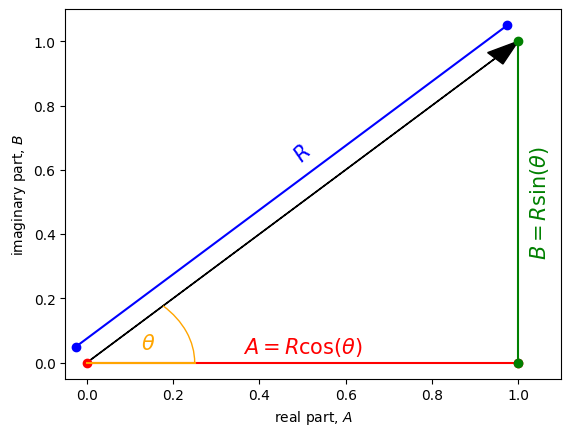

In [11]:
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Arc

A,B = 1,1 #real and imaginary parts

fig, ax = plt.subplots()

ax.arrow(0,0,A,B, head_width=0.05, color='black', length_includes_head=True) #eigenvalue as vector in complex plane

dx = 0.05
ax.plot([0-dx/2,A-dx/2],[0+dx,B+dx],marker='o',c='b')
ax.text(A/2,B/2+3*dx,r'$R$',rotation=math.atan(B/A)*180/math.pi,c='b',fontsize=15,ha='center',va='center')

ax.plot([0,A],[0,0],marker='o',c='r')
ax.text(A/2,0+dx,r'$A=R \cos(\theta)$',c='r',fontsize=15,ha='center',va='center')

ax.plot([A,A],[0,B],marker='o',c='g')
ax.text(A+dx,B/2,r'$B=R \sin(\theta)$',c='g',fontsize=15,ha='center',va='center',rotation=90)

ax.set_xlabel('real part, $A$')
ax.set_ylabel('imaginary part, $B$')
ax.set_xlim(-dx,A+2*dx)
ax.set_ylim(-dx,B+2*dx)

dx=A/4
ax.plot([0,dx],[0,0],c='orange')
ax.add_patch(Arc((0,0), width=2*dx, height=2*dx, theta1=0, theta2=math.atan(B/A)*180/math.pi, edgecolor='orange'))
ax.text(dx/2,dx/6,r'$\theta$',fontsize=15,c='orange')

plt.show()

Now to see how a complex eigenvalue affects the dynamics of our system, consider what happens to that element of $\mathbf{D}^t$ as time proceeds, 

$$
\begin{aligned}
\lambda^t &= (A + Bi)^t\\
&= (\cos(\theta) + \sin(\theta)i)^t\\
&= (R\exp(i \theta))^t\\
&= R^t\exp(i \theta t)\\
&= R^t(\cos(\theta t) + \sin(\theta t)i).
\end{aligned}
$$

Two key implications emerge: 

- $\cos(\theta t) + \sin(\theta t)i$ implies oscillatory dynamics (cycles)
- $\lambda^t$ will shrink with time when $R<1$ and therefore stability in discrete time requires $A^2 + B^2<1$, i.e., the imaginary part, $B$, influences stability

### Continuous time

In continuous time we need to consider $\exp(\lambda t)$ rather than $\lambda^t$,

$$
\begin{aligned}
\exp(\lambda t) &= \exp((A + Bi)t)\\
&= \exp(At + Bti)\\
&= \exp(At)\exp(Bti)\\
&= \exp(At)(\cos(Bt) + \sin(Bt)i).
\end{aligned}
$$

Two key implications emerge: 

- $\cos(B t) + \sin(B t)i$ implies oscillatory dynamics (cycles)
- $\exp(\lambda t)$ will shrink with time when $A<0$ and therefore stability in continuous time only depends on the sign of the real part, $A$

In the 2x2 case there is a shortcut to determine stability in continuous time (a special case of the Routh-Hurwitz stability criteria), regardless of whether the eigenvalues are complex. It comes from the fact that the two eigenvalues (given by the quadratic equation above) sum to $\mathrm{Tr}(\mathbf{M})$ and multiply to $\mathrm{Det}(\mathbf{M})$ (give this a check if you want). So

- $\mathrm{Tr}(\mathbf{M})<0$ and $\mathrm{Det}(\mathbf{M})>0$ implies both eigenvalues are negative (stability)
- $\mathrm{Tr}(\mathbf{M})>0$ and $\mathrm{Det}(\mathbf{M})>0$ implies both eigenvalues are positive (unstable)
- $\mathrm{Det}(\mathbf{M})<0$ implies the eigenvalues have opposite sign (unstable)

Combining this with the fact that we will get oscillations when $\mathrm{Tr}(\mathbf{M})^2 < 4\mathrm{Det}(\mathbf{M})$, we can summarize the dynamics in the following plot. If there are ocillations we call the equilibrium a focus, otherwise it is a node.

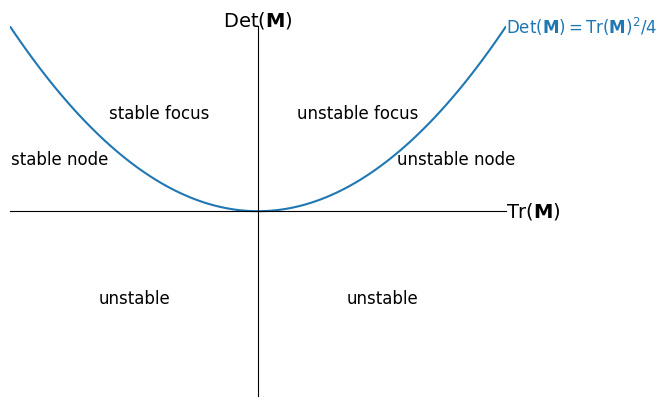

In [49]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-1,1,100)
fig, ax = plt.subplots()

ax.plot(xs, [x**2/4 for x in xs])

ax.set_xlim(-1,1)
ax.set_ylim(-1/4,1/4)

ax.text(0,1/4,r'$\mathrm{Det}(\mathbf{M})$',ha='center',fontsize=14)
ax.text(1,0,r'$\mathrm{Tr}(\mathbf{M})$',va='center',fontsize=14)
ax.text(1,1/4,r'$\mathrm{Det}(\mathbf{M}) = \mathrm{Tr}(\mathbf{M})^2/4$',va='center',fontsize=12, color=plt.cm.tab10(0))
ax.text(1/2,-1/8,'unstable',ha='center',fontsize=12)
ax.text(-1/2,-1/8,'unstable',ha='center',fontsize=12)
ax.text(2/5,1/8,'unstable focus',ha='center',fontsize=12)
ax.text(-2/5,1/8,'stable focus',ha='center',fontsize=12)
ax.text(4/5,1/16,'unstable node',ha='center',fontsize=12)
ax.text(-4/5,1/16,'stable node',ha='center',fontsize=12)

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')
ax.set_xticks([])
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.set_yticks([])
# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

<span id='section2'></span>
## 2. Example
<hr>

To see more concretely how complex eigenvalues appear and affect the dynamics of our models, let's consider a model of sexual selection in continuous time. We will model the mean value of a male trait, $\bar{z}$, such as the length of a birds tail, and the mean value of female preference for that trait, $\bar{p}$ (if $\bar{p}>0$ females tend to prefer larger male traits, if $\bar{p}<0$ females tend to prefer smaller male traits). We assume the optimal male trait value in the absence of sexual selection is $\theta$, i.e., natural selection always pushes $\bar{z}$ towards $\theta$ (we'll take $\theta=0$, meaning $\bar{z}$ is measured relative to the optimum). We assume female choice is costly, i.e., natural selection always pushes $\bar{p}$ towards 0. Finally we will assume that male traits and female preference share some genetic basis, meaning that they will covary (e.g., there may be some alleles that increase the trait value when in males and increase the preference when in females, causing positive covariance). This covariance means that a change in the male trait will cause a change in female preference, and vice-versa.

We can describe the dynamics of $\bar{z}$ and $\bar{p}$ with a system of linear differential equations,

$$
\begin{align}
\frac{\mathrm{d}\bar{z}}{\mathrm{d}t} &= G_z (a \bar{p} - c \bar{z}) - B b \bar{p}\\
\frac{\mathrm{d}\bar{p}}{\mathrm{d}t} &= B (a \bar{p} - c \bar{z}) - G_p b \bar{p},
\end{align}
$$

where $G_z$ and $G_p$ are the amounts of genetic variation in male traits and female preference (this is the "fuel" of evolution, so the rates of evolution are proportional to these variances), $B$ is the covariance between male traits and female preference, $a$ is the strength of sexual selection, and $c$ and $b$ are the strengths of natural selection on male traits and female preference.

This is a linear multivariate model whose dynamics are determined by the matrix 

$$
\mathbf{M} = \begin{pmatrix} -G_zc & G_za - Bb \\ -Bc & Ba - G_pb \end{pmatrix}.
$$ 

The trace and determinant are

$$
\begin{aligned}
\mathrm{Tr}(\mathbf{M})&=-G_zc + Ba - G_pb\\
\mathrm{Det}(\mathbf{M})&=-G_zc(Ba - G_pb)-(G_za - Bb)(-Bc)\\
&=bc(G_pG_z-B^2).
\end{aligned}
$$ 

Stability requires $\mathrm{Tr}(\mathbf{M})<0$ and $\mathrm{Det}(\mathbf{M})>0$. We have complex eigenvalues, and therefore cycling, whenever $\mathrm{Tr}(\mathbf{M})^2 < 4\mathrm{Det}(\mathbf{M})$.

Below we plot the dynamics when the equilibrium is a stable focus, meaning the oscillations decay to the equilibrium over time.

Biologically, this cycling occurs because initially the mean male trait is positive but there is no mean female preference. This implies that both natural and sexual selection favour smaller male traits, causing the mean to decline. But because of a correlated response, female preference also declines, favouring male traits less than 0. Eventually female preference becomes too costly and begins to increase back toward zero. This causes a correlated increase in the male trait, and so on. 

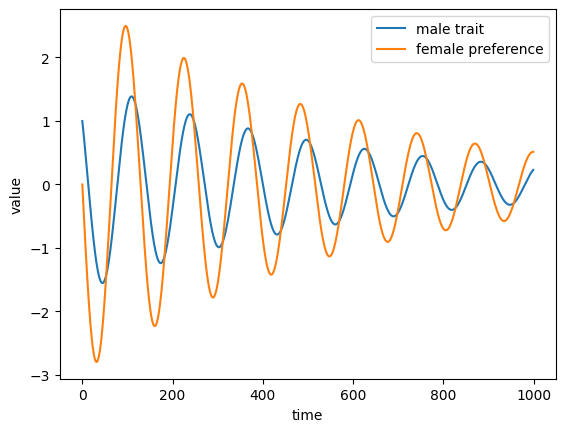

In [168]:
Gz, Gp, B, a, b, c, z0, p0, tmax = 0.15, 0.8, 0.32, 0.95, 0.3, 0.45, 1, 0, 1000 #parameter values

# general solution
from sympy import *
M = Matrix([[-Gz*c, Gz*a-b*B],
            [-B*c, -Gp*b+a*B]])
A, D = M.diagonalize() #quick way to get matrix of right eigenvectors (A) and eigenvalues (D)
n0 = Matrix([z0,p0]) #note this is made into a column vector automatically
nt = A*exp(D*t)*A.inv()*n0 #general solution

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([re(nt.subs(t,i)[0]) for i in range(tmax)], label='male trait') #need to remove the imaginary part because of numerical error
ax.plot([re(nt.subs(t,i)[1]) for i in range(tmax)], label='female preference')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('value')
plt.show()

<span id='section3'></span>
## 3. Summary
<hr>

- complex eigenvalues, $\lambda = A + Bi$, indicate oscillatory dynamics
- the imaginary part, $B$, influences stability in discrete time but not continuous time

Practice problems from the textbook: 7.1-11